In [2]:
import pandas as pd
import numpy as np

## Load Dataset

In [4]:
# Load dataset
df = pd.read_csv("sales_and_customer_insights.csv")
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


## Data Overview & Understanding

In [9]:
df.shape

(10000, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [14]:
df.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


In [16]:
df.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

## Data Cleaning

In [21]:
df = df.drop_duplicates()

In [27]:
df = df.dropna(subset=['Customer_ID', 'Purchase_Frequency', 'Average_Order_Value'])

## Exploratory Data Analysis (EDA)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

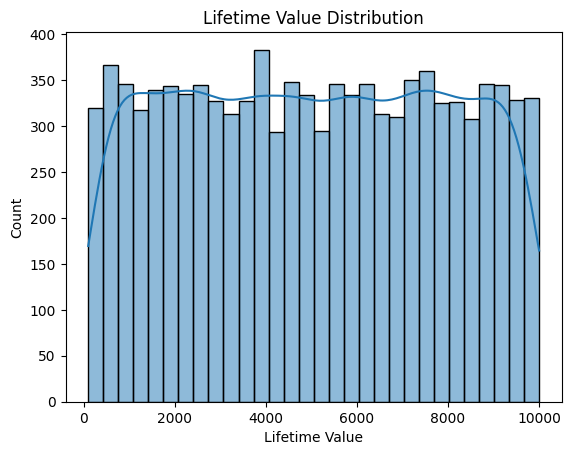

In [34]:
# Distribution of Lifetime Value
sns.histplot(df['Lifetime_Value'], bins=30, kde=True)
plt.title("Lifetime Value Distribution")
plt.xlabel("Lifetime Value")
plt.ylabel("Count")
plt.show()


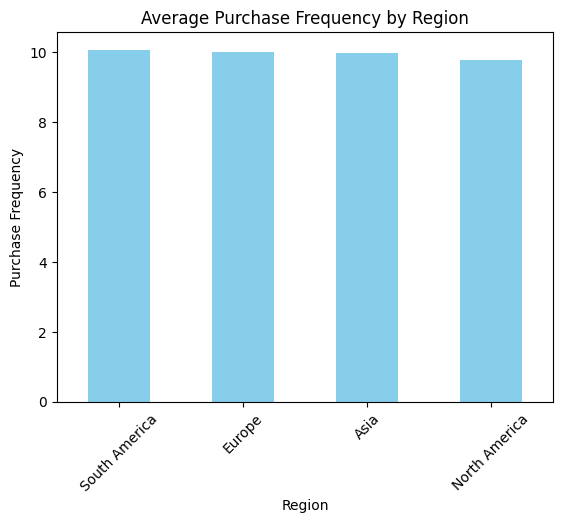

In [36]:
# Purchase Frequency by Region
region_freq = df.groupby('Region')['Purchase_Frequency'].mean().sort_values(ascending=False)
region_freq.plot(kind='bar', color='skyblue')
plt.title("Average Purchase Frequency by Region")
plt.ylabel("Purchase Frequency")
plt.xticks(rotation=45)
plt.show()


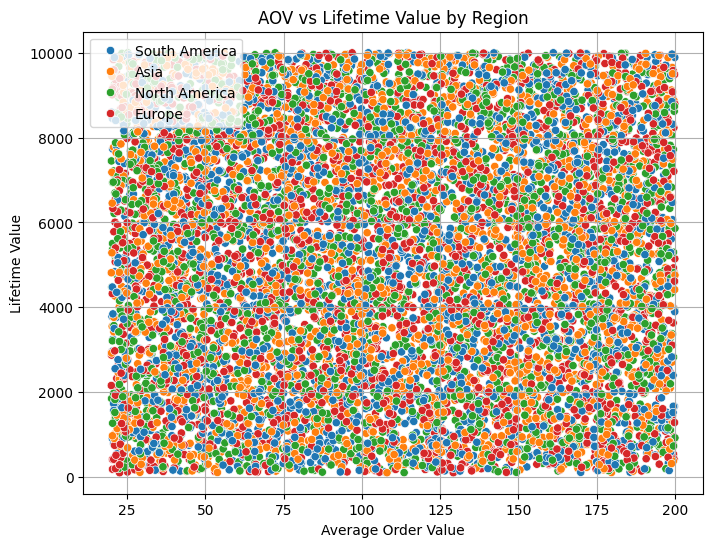

In [38]:
#Average Order Value vs Lifetime Value
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Average_Order_Value', y='Lifetime_Value', hue='Region', palette='tab10')
plt.title("AOV vs Lifetime Value by Region")
plt.xlabel("Average Order Value")
plt.ylabel("Lifetime Value")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

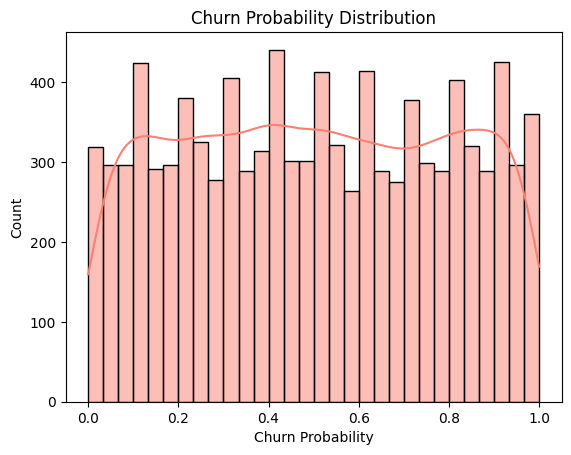

In [40]:
# Churn Probability Distribution
sns.histplot(df['Churn_Probability'], bins=30, kde=True, color='salmon')
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()


C:\Users\yasir\AppData\Local\Temp\ipykernel_18544\3840651972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Time_Between_Purchases', palette='pastel')


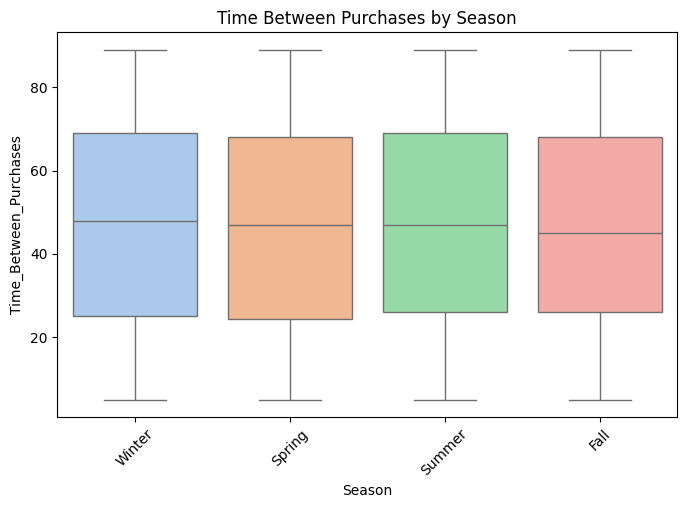

In [42]:
# Time Between Purchases by Season
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Season', y='Time_Between_Purchases', palette='pastel')
plt.title("Time Between Purchases by Season")
plt.xticks(rotation=45)
plt.show()

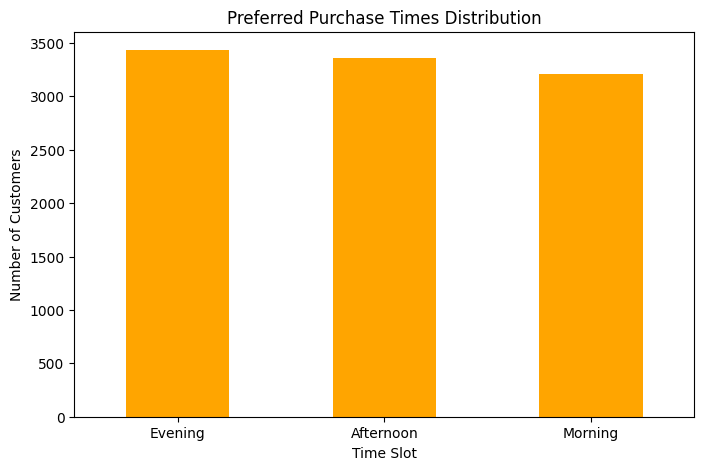

In [44]:
# Preferred Purchase Times Count
plt.figure(figsize=(8, 5))
df['Preferred_Purchase_Times'].value_counts().plot(kind='bar', color='orange')
plt.title("Preferred Purchase Times Distribution")
plt.xlabel("Time Slot")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

## Feature Engineering

In [47]:
# Select relevant features for clustering
customer_df = df[['Customer_ID', 'Purchase_Frequency', 'Average_Order_Value',
                  'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value']].copy()

In [49]:
# Rename for clarity
customer_df.rename(columns={'Customer_ID': 'CustomerID'}, inplace=True)

In [53]:
customer_df.head()

,CustomerID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
0,CUST_9HOS83,17,172.57,45,0.98,952.81
1,CUST_AJU17N,10,64.89,6,0.66,5427.51
2,CUST_11XNYF,3,120.38,23,0.60,3994.80
3,CUST_IGH8G3,12,70.34,5,0.78,4880.01
4,CUST_OK6PUM,18,42.39,10,0.52,8557.70


## Feature Scaling (Preprocessing)

In [56]:
from sklearn.preprocessing import StandardScaler

In [58]:
features = customer_df.drop('CustomerID', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## KMeans Clustering & Elbow Method

In [61]:
from sklearn.cluster import KMeans

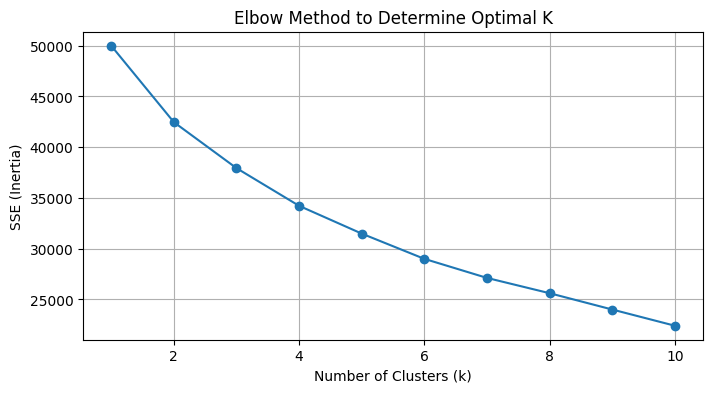

In [63]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()